In [1]:
from src import SQL_Executor, SQL_Queries
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

executor = SQL_Executor()
query = SQL_Queries().Portfolio()

def smart_format(x, pos):
    if x >= 1000000:
        return f'{x/1000000:.1f}M'
    elif x >= 1000:
        return f'{x/1000:.0f}k'
    else:
        return f'{x:.0f}'

users_aggregated_df = executor.execute_query(query.users_aggregated())
transactions_aggregated_df = executor.execute_query(query.transactions_aggregated())
installment_plans_df = executor.execute_query(query.installment_plans())
popular_categories_df = executor.execute_query(query.popular_categories())
new_and_active_customers_df = users_aggregated_df.merge(transactions_aggregated_df, how = "left", on="month")

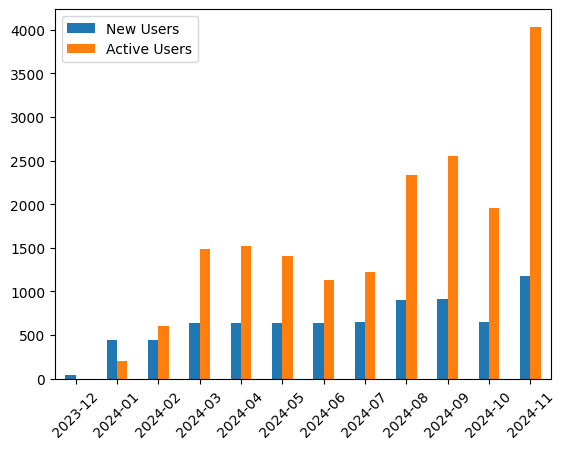

In [2]:
new_and_active_customers_df = new_and_active_customers_df.set_index("month")
ax = new_and_active_customers_df[
    ["new_users_count", 
     "active_users_count"]
    ].plot(
        kind="bar",
        rot = 45,
        xlabel="",
        legend=True
        )
ax.legend(["New Users", "Active Users"]);

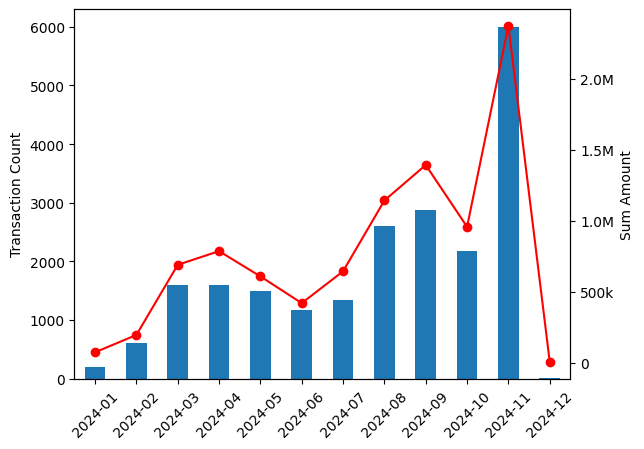

In [3]:
transactions_aggregated_df = transactions_aggregated_df.set_index("month")
ax = transactions_aggregated_df["transactions_count"].plot(kind="bar", rot=45, xlabel="")
ax2 = ax.twinx()
ax2.plot(transactions_aggregated_df.index, transactions_aggregated_df["sum_amount"], color='red', marker='o')
ax.set_ylabel("Transaction Count")
ax2.set_ylabel("Sum Amount")
ax2.yaxis.set_major_formatter(FuncFormatter(smart_format))


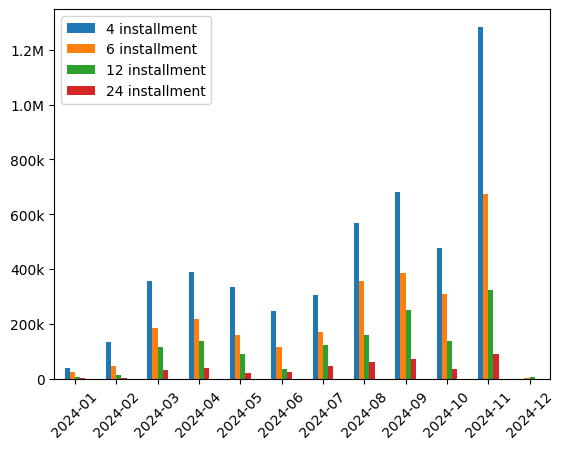

In [4]:
installment_plans_df = installment_plans_df.set_index("month")
ax = installment_plans_df[
    [
        "4_installment_transaction_volume",
        "6_installment_transaction_volume",
        "12_installment_transaction_volume",
        "24_installment_transaction_volume",
    ]
    ].plot(kind="bar", rot=45, xlabel="")
plt.legend([
    "4 installment",
    "6 installment",
    "12 installment",
    "24 installment"
    ])
ax.yaxis.set_major_formatter(FuncFormatter(smart_format))

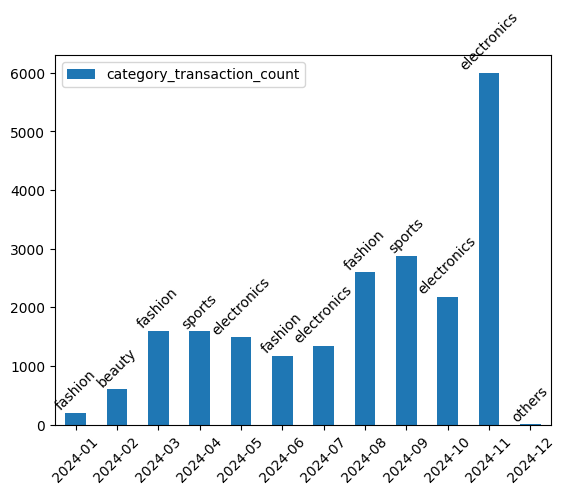

In [5]:
ax = popular_categories_df.set_index("month")[["category_transaction_count"]].plot(kind="bar")
ax.bar_label(ax.containers[0], labels=popular_categories_df.set_index("month")["category"], rotation=45)
plt.xticks(rotation=45)
plt.xlabel("");